In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Amritrajdubey/Black_friday_test/main/blackFriday_test.csv')

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Amritrajdubey/Black_friday_train/main/blackFriday_train.csv')

In [6]:
print(df.shape,df1.shape)

(233599, 11) (550068, 12)


In [91]:
df_final = df1.append(df , sort = False)

In [5]:
df_final

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [7]:
# In above case all variables are independent variable and Age,Product_ID,City,Stay,Martial status have just 2/3 sub groups so we will not consider them in outlier case.
# Rather we will consider Product_category , Purchase price to handle outlier .

In [8]:
df_final.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [19]:
# Dropping User_ID
df_final.drop(['User_ID'],axis =1 , inplace=True)

In [23]:
num_col = [x for x in df_final.columns if df_final.dtypes[x]!='O']
Cat_col = [x for x in df_final.columns if df_final.dtypes[x]=='O']

In [24]:
Cat_col

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [25]:
num_col

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

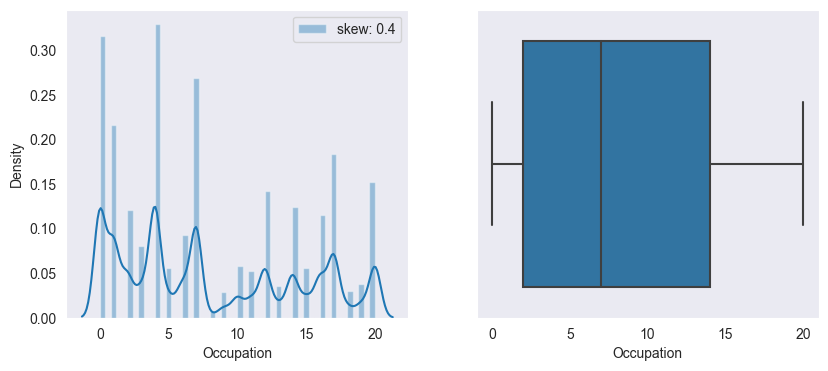

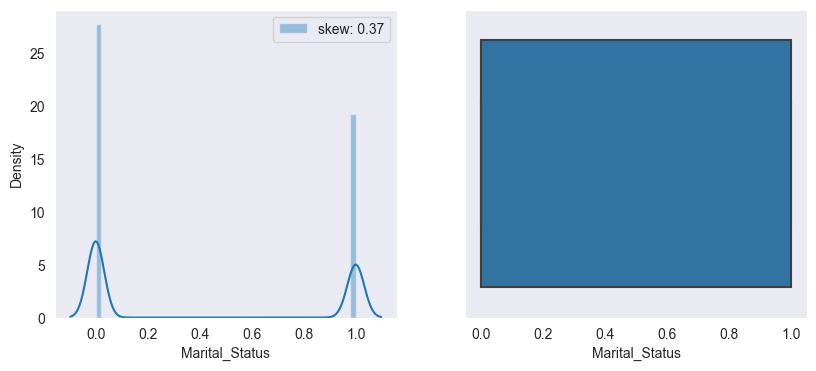

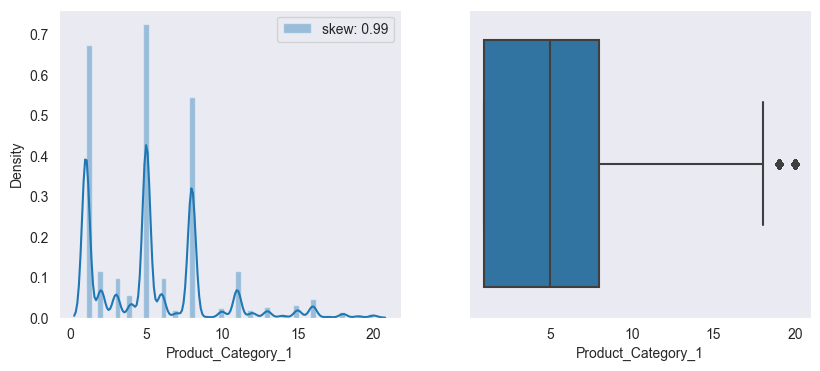

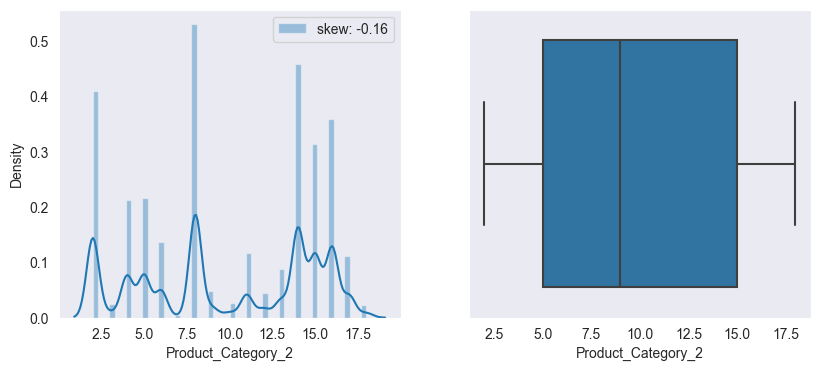

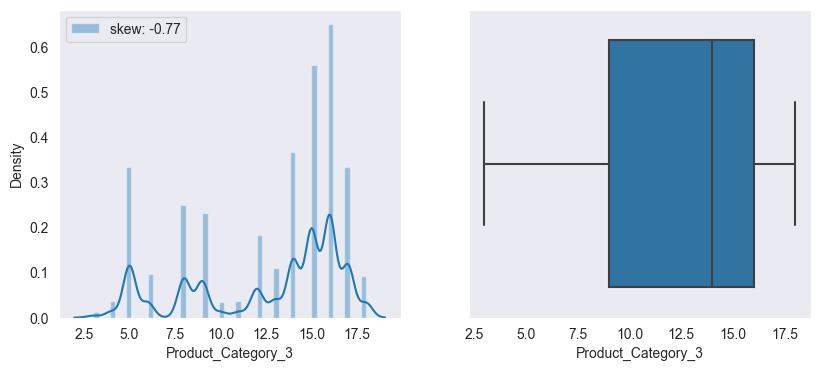

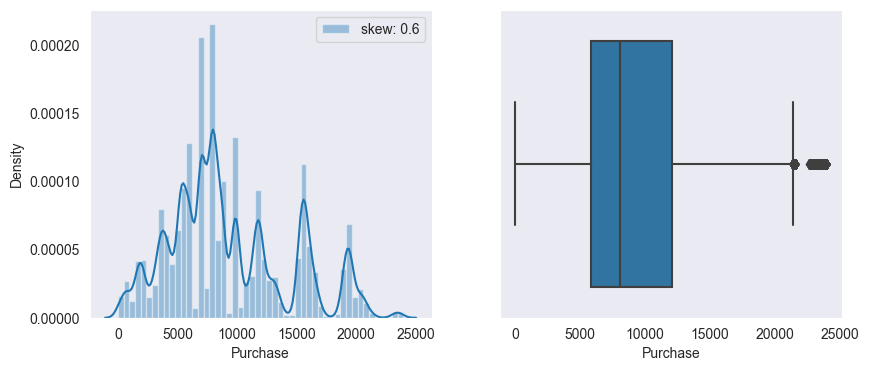

In [34]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')
for i in num_col:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df_final[i], label="skew: " + str(np.round(df_final[i].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df_final[i])
    plt.show()

In [35]:
# From above we can conclude outliers in Purchase and Product_category_1

* Handling Outlier using IQR

In [36]:
df_final.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [41]:
# Calculating Quartile from the data having outliers(Product_Category_1 & Purchase)

Q1 = df_final.Product_Category_1.quantile(.25)
Q3 = df_final.Product_Category_1.quantile(.75)
IQR = Q3-Q1

Q_1= df_final.Purchase.quantile(.25)
Q_3= df_final.Purchase.quantile(.75)
IQR1= Q_3-Q_1


In [42]:
Q1,Q3,IQR

(1.0, 8.0, 7.0)

In [43]:
Q_1,Q_3,IQR1

(5823.0, 12054.0, 6231.0)

In [44]:
# Finding upper and lower limits for both columns.

# Lower and upper limit of Product_category_1
Lower1 = Q1 - IQR*1.5
Upper1 = Q3 + IQR*1.5

+3
# Lower and upper limit of Purchase
Lower_1 = Q_1 - IQR1*1.5
Upper_1 = Q_3 + IQR1*1.5

In [48]:
# Lower and upper limit of Product_category_1
print(Lower1,Upper1)
print('\n')
# Lower and upper limit of Purchase
print(Lower_1,Upper_1)

-9.5 18.5


-3523.5 21400.5


In [49]:
# df_final with outlier in Product_Category_1

df_final[(df_final.Product_Category_1<Lower1)|(df_final.Product_Category_1>Upper1)]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
545915,P00375436,F,0-17,10,A,2,0,20,NaN,NaN,612.0
545916,P00372445,M,55+,16,C,4+,0,20,NaN,NaN,119.0
545917,P00375436,M,46-50,7,B,2,1,20,NaN,NaN,481.0
545918,P00375436,F,51-55,9,A,1,0,20,NaN,NaN,480.0
545919,P00372445,M,36-45,1,B,1,1,20,NaN,NaN,241.0
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368.0
550064,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371.0
550065,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137.0
550066,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365.0


In [55]:
df1 = df_final[~((df_final.Product_Category_1<Lower1)|(df_final.Product_Category_1>Upper1))]

# One more code as above df1= df_final[~((df_final.Product_Category_1<Lower1)&(df_final.Product_Category_1>Upper1))]

<AxesSubplot: xlabel='Product_Category_1'>

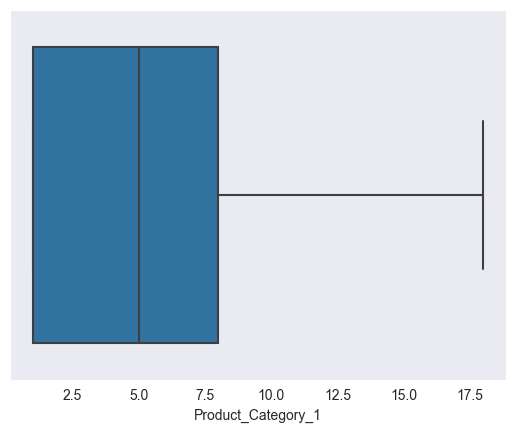

In [56]:
# Plotting box plot to check for outlier in Product_Category_1

sns.boxplot(df1['Product_Category_1'])

<AxesSubplot: xlabel='Product_Category_1'>

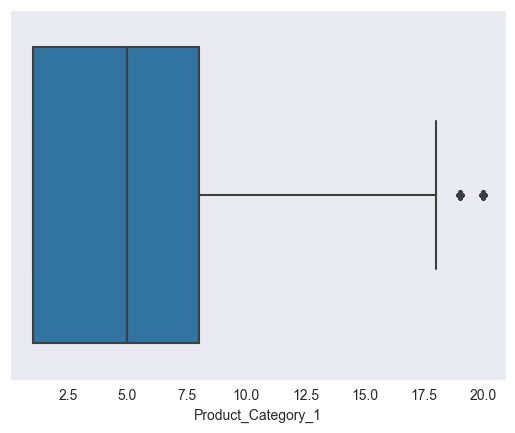

In [57]:
sns.boxplot(df_final['Product_Category_1'])

In [ ]:
# Thus dataframe with no outlier in Product_category_1 is df1

In [58]:
# Checking for outlier in Purchase column

df_final[(df_final.Purchase<Lower_1)|(df_final.Purchase>Upper_1)]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
343,P00117642,M,26-35,2,B,3,0,10,16.0,NaN,23603.0
375,P00119342,F,36-45,3,A,1,0,10,13.0,NaN,23792.0
652,P00087042,M,18-25,9,B,1,0,10,14.0,16.0,23233.0
736,P00159542,F,26-35,20,C,2,0,10,15.0,16.0,23595.0
1041,P00052842,F,26-35,2,B,1,0,10,15.0,NaN,23341.0
...,...,...,...,...,...,...,...,...,...,...,...
544488,P00116142,M,26-35,20,B,1,0,10,13.0,16.0,23753.0
544704,P00085342,F,18-25,4,B,2,0,10,13.0,NaN,23724.0
544743,P00202242,F,26-35,1,A,0,1,10,16.0,NaN,23529.0
545663,P00116142,M,51-55,0,C,1,1,10,13.0,16.0,23663.0


In [60]:
df2 = df_final[~((df_final.Purchase<Lower_1)|(df_final.Purchase>Upper_1))]

<AxesSubplot: xlabel='Purchase'>

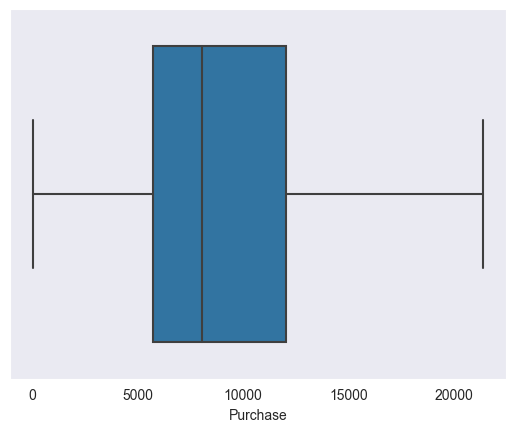

In [62]:
# Checking for outlier in new dataframe 

sns.boxplot(df2['Purchase'])

In [90]:
# Creating final dataframe with no outlier in both columns

df_no_outlier = df_final[~(((df_final.Purchase<Lower_1)|(df_final.Purchase>Upper_1))|((df_final.Product_Category_1<Lower1)|(df_final.Product_Category_1>Upper1)))]
df_no_outlier.shape

(776837, 11)

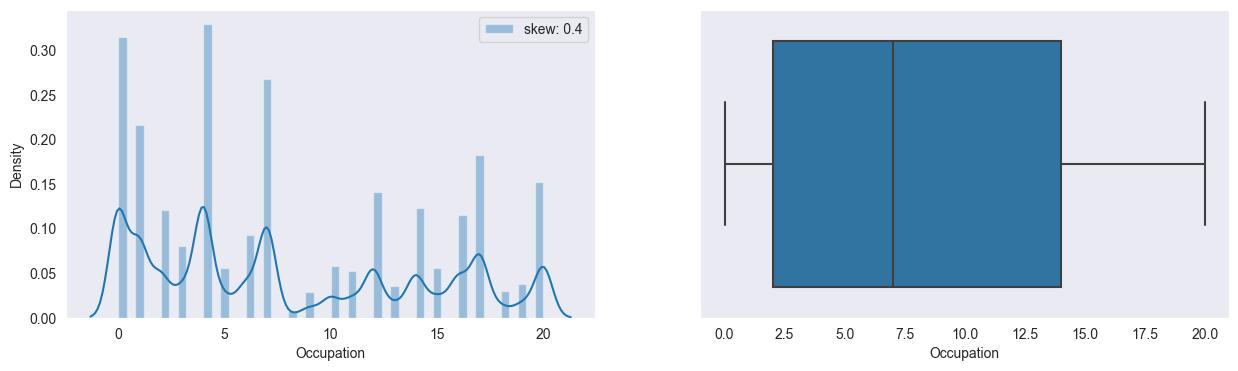

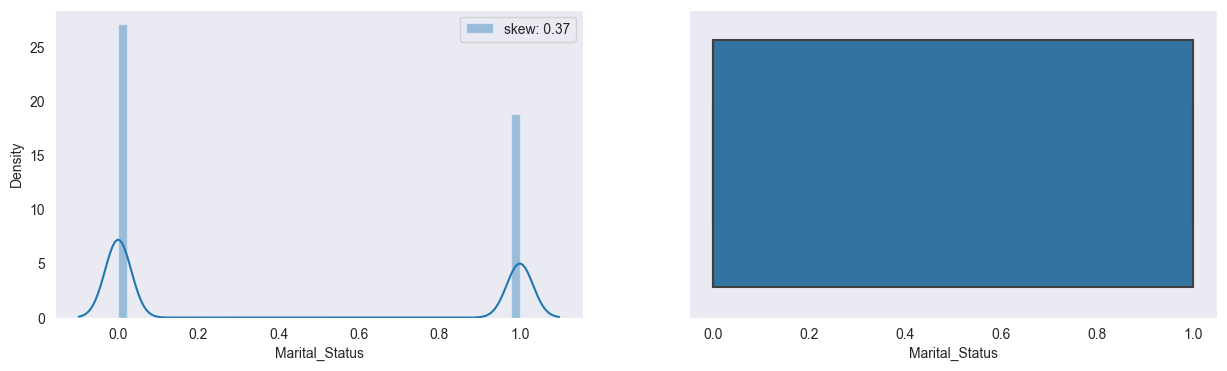

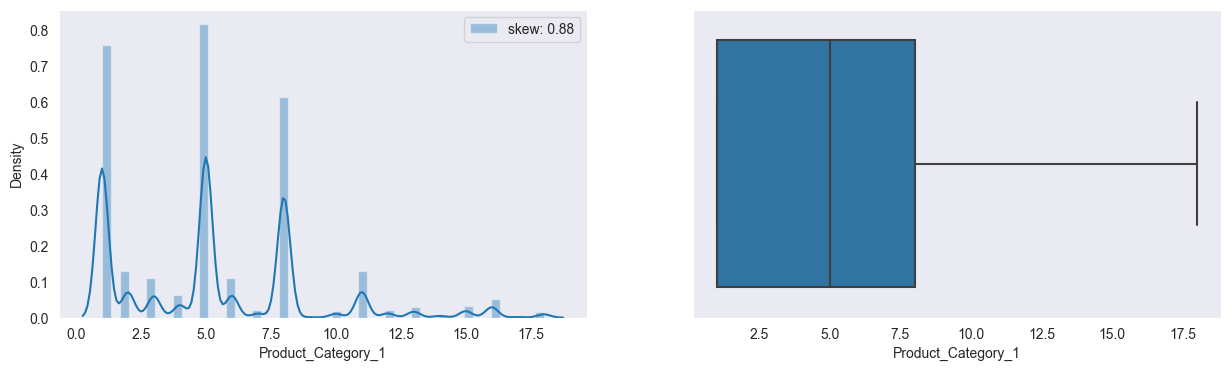

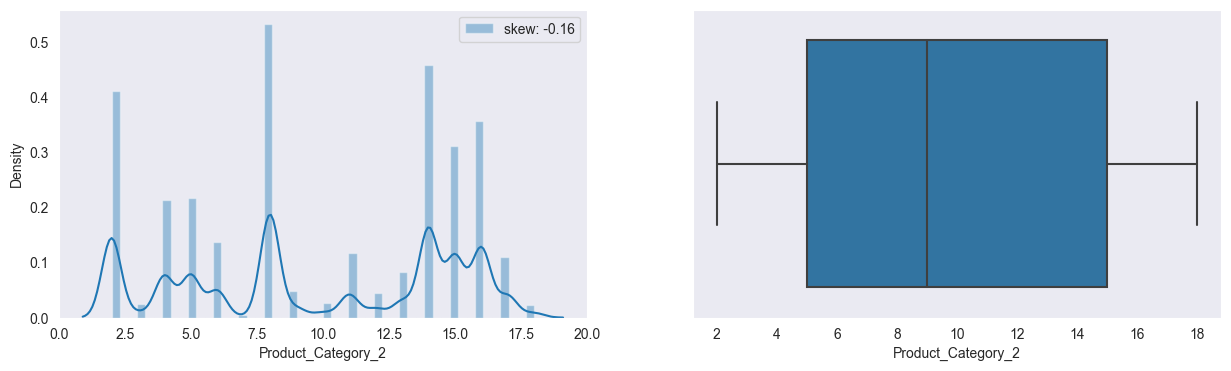

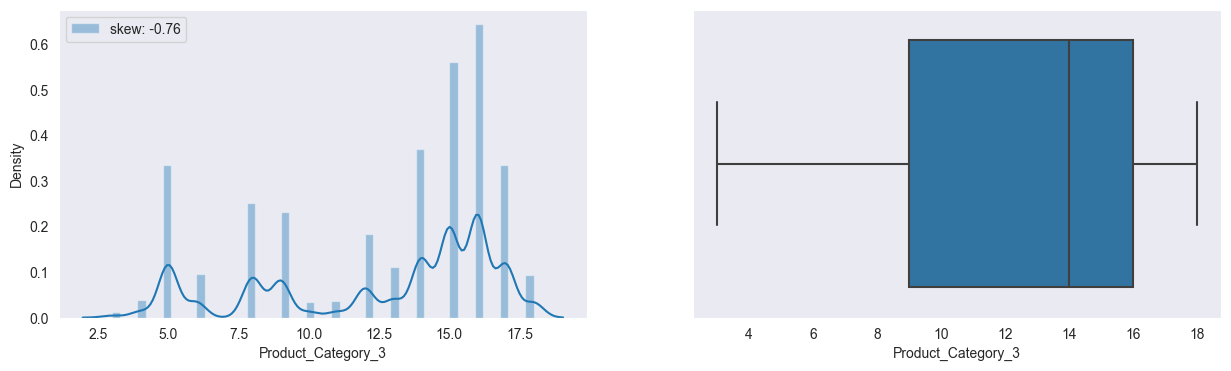

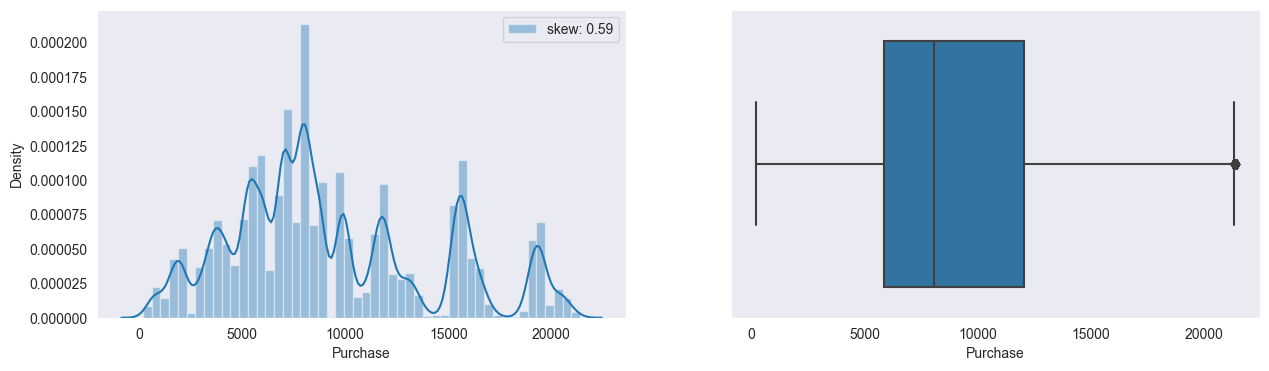

In [88]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')
for i in num_col:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df_no_outlier[i], label="skew: " + str(np.round(df_no_outlier[i].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df_no_outlier[i])
    plt.show()

In [ ]:
# We can colclude from above as having no outlier in the final dataset